# ¡Hola Adolfo! 😊

Mi nombre es **Alejandro Castellanos** y hoy tengo el placer de ser el revisor de tu proyecto.

Voy a revisar todo tu código con detalle, buscando tanto los puntos fuertes como aquellos en los que podrías mejorar. Te dejaré comentarios a lo largo del notebook, destacando lo que has hecho bien y sugiriendo ajustes donde sea necesario. Si encuentro algún error, no te preocupes, te lo haré saber de forma clara y te daré información útil para que puedas corregirlo en la próxima iteración. Si en algún punto tienes comentarios, siéntete libre de dejarlos también.


Encontrarás mis comentarios específicos dentro de cajas verdes, amarillas o rojas, es muy importante que no muevas, modifiques o borres mis comentarios, con el fin de tener un seguimiento adecuado de tu proceso:


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class=“tocSkip”></a>
Si todo está perfecto.
</div>

<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class=“tocSkip”></a>
Si tu código está bien pero se puede mejorar o hay algún detalle que le hace falta.
</div>

<div class="alert alert-block alert-danger">
<b>Comentario del revisor</b> <a class=“tocSkip”></a>
Si de pronto hace falta algo o existe algún problema con tu código o conclusiones.
</div>

Puedes responderme de esta forma:
<div class="alert alert-block alert-info">
<b>Respuesta del estudiante</b> <a class=“tocSkip”></a>
</div>

A continuación te dejaré un comentario general con mi valoración del proyecto. **¡Mi objetivo es que sigas aprendiendo y mejorando con cada paso!**


-----

<div class="alert alert-block alert-success">
<b>Comentario General del revisor (1ra Iteración)</b> <a class=“tocSkip”></a>

Adolfo completaste todas las tareas propuestas para el proyecto de manera sobresaliente. Demostraste un buen manejo de las herramientas de manipulación y visualización de datos, y un buen dominio en la prueba de hipótesis, lo cual fortalece el análisis de los datos con los que has trabajado. 

Como recomendación, debes asegurarte que tus gráficas sean completamente claras, y de ser necesario aplicar la configuración adecuada para que los datos puedan ser analizados fácilmente.

Continúa desarrollando estas habilidades, ya que serán claves en futuros proyectos.

Éxitos en tu próximo sprint 🚀

*Estado del Proyecto:* **Aprobado**

</div>

------

# Análisis para Zuber

## Introducción

Zuber es una nueva compañia de viajes compartidos en la ciudad de Chicago.

Pretendemos obtener información de diferentes bases de datos para encontrar patrones en la información que tenemos disponible. Vamos a comprender las preferencias que tienen los pasajeros de taxi y el impacto que existen de los factores externos en los viajes. 

Al final vamos a tratar de probar una hipótesis sobre el impacto que tiene el clima en la frecuencia de los viajes.

La información en particular es de los viajes realizados en la ciudad de Chicago.

### 1. Importar archivos

In [1]:
import pandas as pd

# Primero cargamos los datasets
df_companies = pd.read_csv('/datasets/project_sql_result_01.csv')
df_locations = pd.read_csv('/datasets/project_sql_result_04.csv')
 

### 2. Exploración de los datos

In [2]:
# verificamos la información general de los dataframes
print(df_companies.info())
print()
print(df_locations.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   company_name  64 non-null     object
 1   trips_amount  64 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ KB
None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   dropoff_location_name  94 non-null     object 
 1   average_trips          94 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.6+ KB
None


En general podemos apreciar que los dataframes no tienen datos nulos y el tipo de datos que contiene cada columna, cerciorandonos aquí que las columnas trips_amount y average_trips son de tipo númerico, es decir, entero (int) y/o flotante (float). También vemos el tamaño de las listas y cuantas filas contienen.

In [3]:
 # Ahora vamos a dar un vistazo a cada dataframe

display(df_companies.head())
print()
display(df_locations.head())

,company_name,trips_amount
0,Flash Cab,19558
1,Taxi Affiliation Services,11422
2,Medallion Leasing,10367
3,Yellow Cab,9888
4,Taxi Affiliation Service Yellow,9299


,dropoff_location_name,average_trips
0,Loop,10727.466667
1,River North,9523.666667
2,Streeterville,6664.666667
3,West Loop,5163.666667
4,O'Hare,2546.900000


<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteración)</b> <a class=“tocSkip”></a>

Muy buen trabajo importando las librerías y los datos del proyecto. Adicionalmente usaste correctamente las funciones `info` y `head`, esto te permite hacer una primera revisión de los datos, su estructura y contenido.

</div>

### 3. Los 10 principales barrios como destino de los viajes

In [4]:
# Al no saber como viene el orden del dataframe lo ordenamos de forma descendente
top10_locations = df_locations.sort_values(by='average_trips', ascending=False).head(10)
display(top10_locations)


,dropoff_location_name,average_trips
0,Loop,10727.466667
1,River North,9523.666667
2,Streeterville,6664.666667
3,West Loop,5163.666667
4,O'Hare,2546.900000
5,Lake View,2420.966667
6,Grant Park,2068.533333
7,Museum Campus,1510.000000
8,Gold Coast,1364.233333
9,Sheffield & DePaul,1259.766667


Podemos ver que el principal destino es el barrio de Loop, y es lógico ya que en este barrio se encuentra el distrito financiero de Chicago, en este barrio hay oficinas, comercios y ya se ha vuelto también turística, con museos, restaurantes y paseos. 

### 4. Gráficos

In [5]:
# importamos las librerias para realizar gráficos
import matplotlib.pyplot as plt
import seaborn as sns


#### 4.1 Relación de las compañias de taxi y los viajes realizados

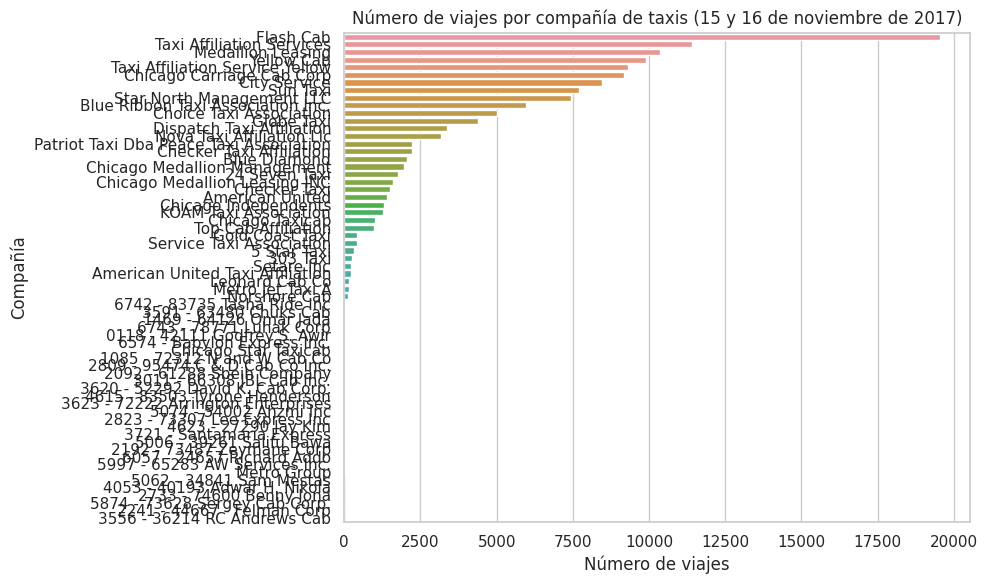

In [6]:
# Estilo de los gráficos
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))

# Gráfico de compañías de taxi y número de viajes
sns.barplot(x='trips_amount', y='company_name', data=df_companies.sort_values(by='trips_amount', ascending=False))
plt.title('Número de viajes por compañía de taxis (15 y 16 de noviembre de 2017)')
plt.xlabel('Número de viajes')
plt.ylabel('Compañía')
plt.tight_layout()
plt.show()


La información que tenemos es de 64 compañías que hay en la zona de Chicago, hay mucha competencia. La gráfica se realizó con la información del primer dataframe, en dónde contiene información de las compañias y de los viajes realizados los días 15 y 16 de noviembre de 2017, siendo así que la empresa que tuvo más viajes es 'Flash Cab', viendo que es quién domina ese mercado de viajes.  

<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteración)</b> <a class=“tocSkip”></a>

¡Muy buen trabajo con la gráfica! Se observa que Flash Cab lidera en volumen de viajes, lo que sugiere una fuerte concentración del mercado. Esto puede estar relacionado con su cobertura, cantidad de vehículos o buenas estrategias comerciales.

<div class="alert alert-block alert-warning">
<b>Comentario del revisor (1ra Iteración)</b> <a class=“tocSkip”></a>

Como recomendación, puedes configurar la gráfica para solo mostrar un Top de empresas, ya que si te das cuenta más de la mitad de empresas tienen muy pocos datos. Esto le dará claridad a la información y facilitará su interpretación.

</div>
</div>

#### 4.2 Principales barrios de destino de los viajes realizados

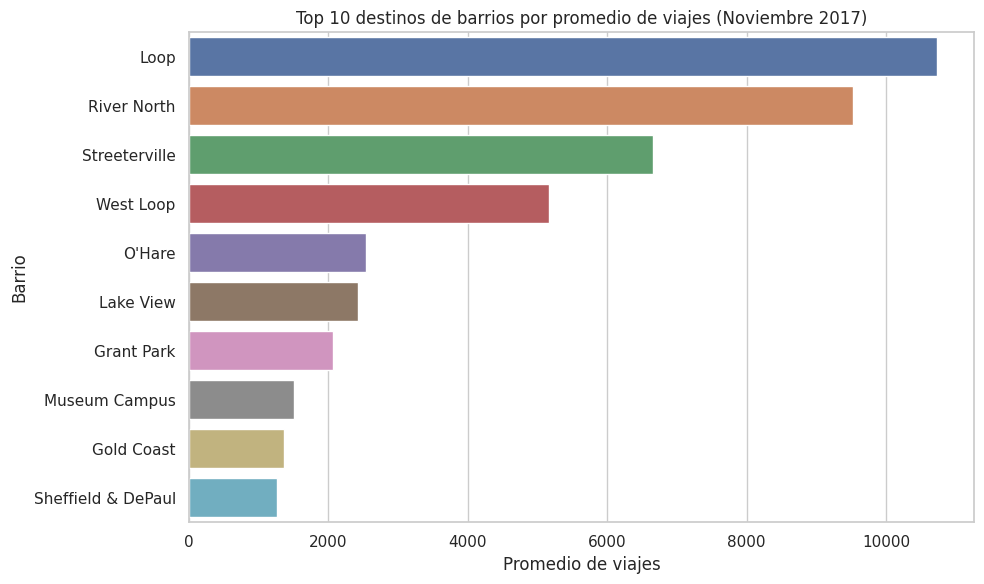

In [7]:
# Gráfico de los 10 principales barrios de destino
plt.figure(figsize=(10, 6))
sns.barplot(x='average_trips', y='dropoff_location_name', data=top10_locations)
plt.title('Top 10 destinos de barrios por promedio de viajes (Noviembre 2017)')
plt.xlabel('Promedio de viajes')
plt.ylabel('Barrio')
plt.tight_layout()
plt.show()

Aqui usamos el listado que obtuvimos de los 10 principales barrrios de destino, y como ya lo habiamos visto en forma de tabla, ahora podemos apreciarlo en una gráfica, viendo que el principal destino es el barrio de 'Loop' que es el distrito financiero de Chicago.

<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteración)</b> <a class=“tocSkip”></a>

¡Buen trabajo obteniendo el Top de barrios! Lograste identificar y jerarquizar bien los de mayor actividad, destacando la diferencia notable con barrios como Loop y River North, que seguramente destacan por su relevancia comercial y turística.

</div>

### 5. Prueba de hipótesis

La hipótesis que vamos a demostrar es que "La duración promedio de los viajes desde el barrio de Loop hasta el Aeropuerto Internacional, que esta en el barrio de O'Hare, cambia los sábados lluviosos"

Vamos a usar un dataset que contiene los datos sobre los viajes desde el barrio de Loop hasta el Aeropuerto Internacional O'Hare.

In [8]:
trips_airport = pd.read_csv('/datasets/project_sql_result_07.csv')
print(trips_airport.info())
print()
display(trips_airport.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   start_ts            1068 non-null   object 
 1   weather_conditions  1068 non-null   object 
 2   duration_seconds    1068 non-null   float64
dtypes: float64(1), object(2)
memory usage: 25.2+ KB
None



,start_ts,weather_conditions,duration_seconds
0,2017-11-25 16:00:00,Good,2410.0
1,2017-11-25 14:00:00,Good,1920.0
2,2017-11-25 12:00:00,Good,1543.0
3,2017-11-04 10:00:00,Good,2512.0
4,2017-11-11 07:00:00,Good,1440.0


Al explorar la información del dataset, vemos que la columna 'start_ts' es del tipo objeto y al ser una fecha la vamos a cambiar a tipo 'datetime' para poder trabajar con la fecha.

In [9]:
trips_airport['start_ts'] = pd.to_datetime(trips_airport['start_ts'])

# confirmamos se haya hecho el cambio
print(trips_airport.info())
print()
display(trips_airport.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   start_ts            1068 non-null   datetime64[ns]
 1   weather_conditions  1068 non-null   object        
 2   duration_seconds    1068 non-null   float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 25.2+ KB
None



,start_ts,weather_conditions,duration_seconds
0,2017-11-25 16:00:00,Good,2410.0
1,2017-11-25 14:00:00,Good,1920.0
2,2017-11-25 12:00:00,Good,1543.0
3,2017-11-04 10:00:00,Good,2512.0
4,2017-11-11 07:00:00,Good,1440.0


El dataframe contiene solo viajes de los días sábado, ahora separaremos los viajes con las condiciones climáticas 'Good' y los de condiciones climáticas 'Bad'. Esto nos va a ayudar para realizar la prueba estadística "T" de muestras independientes.


In [10]:
rainy_trips = trips_airport[trips_airport['weather_conditions'] == 'Bad']['duration_seconds']
clear_trips = trips_airport[trips_airport['weather_conditions'] == 'Good']['duration_seconds']

### 5.1 Formulación de hipótesis

**Hipótesis nula (H0)** = La duración promedio de los viajes de los sábados lluviosos es igual al de los sábados sin lluvia. 

**Hipótesis alternativa (H1)** = La duración promedio es diferente.

In [11]:
#Determinamos el nivel de significancia(alfa)
alpha = 0.05

Ahora realizamos la prueba estadística para probar la hipótesis

In [12]:
from scipy import stats

# Prueba t para muestras independientes
results = stats.ttest_ind(rainy_trips, clear_trips, equal_var=False)  
print('valor p:', results.pvalue)

valor p: 6.738994326108734e-12


In [13]:
if results.pvalue < alpha:
    print('Rechazamos la hipótesis nula: hay diferencia significativa en la duración de los viajes los sábados lluviosos.')
else:
    print('No se rechaza la hipótesis nula: no hay evidencia suficiente para decir que cambia la duración los sábados lluviosos.')

Rechazamos la hipótesis nula: hay diferencia significativa en la duración de los viajes los sábados lluviosos.


### 5.2 Resultado de la hipótesis

Podemos decir que la duración promedio de los viajes desde Loop hasta el Aeropuerto Internacional O'Hare cambia los sábados lluviosos.

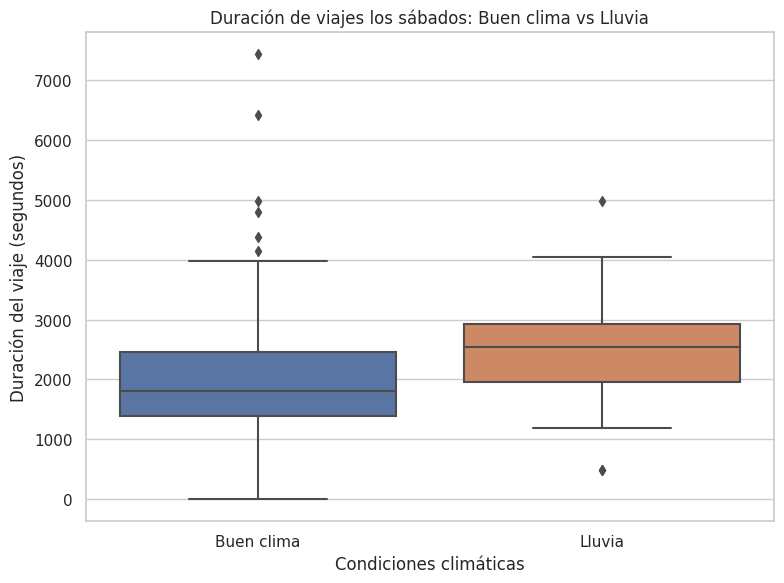

In [14]:

# Hacemos un gráfico de caja para visualizar mejor el planteamiento de la hipótesis
plt.figure(figsize=(8, 6))
sns.boxplot(x='weather_conditions', y='duration_seconds', data=trips_airport)
plt.title('Duración de viajes los sábados: Buen clima vs Lluvia')
plt.xlabel('Condiciones climáticas')
plt.ylabel('Duración del viaje (segundos)')
plt.xticks([0, 1], ['Buen clima', 'Lluvia'])
plt.tight_layout()
plt.show()

Con la gráfica podemos reforzar lo probado en la hipótesis, observando que la mediana si es diferente entre el buen clima y los días lluviosos.

## Conclusión

Con el análisis hecho para la empresa **Zuber** pudimos ver la preferencia que tienen los usuarios en los viajes que realizan. Siendo la empresa de taxis que lleva la preferencia la de 'Flash Cab' seguido de 'Taxi Affiliation Services' y el destino más solicitado es el del barrio de 'Loop' seguido de 'River North'.

Ahora bien, también visualizamos que las condiciones climáticas afecta en las solicitudes de viajes en taxi. Hicimos un análisis muy particular de los viajes realizados los días sábado desde el barrio 'Loop' hacia el barrio de 'O'Hare' en dónde se encuentra el aeropuerto internacional, demostrando así que la duración promedio de los viajes es diferente los días lluviosos que los días sin lluvía. La lluvia genera más tráfico, además de que la gente también maneja más lento esos días.


<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteración)</b> <a class=“tocSkip”></a>

¡Excelente trabajo en esta sección de prueba de hipótesis! Has seguido todos los pasos necesarios. Planteaste claramente la hipótesis, transformaste correctamente el tipo de dato de la fecha, filtraste y separaste los datos según condiciones climáticas y aplicaste la prueba t con la parametrización adecuada (`equal_var=False`). Además, agregaste una visualización con boxplot que refuerza los resultados obtenidos.

</div>